In [1]:
import sys
import os

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from luxgiant_dstream.manhattan_type import miami_draw

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Create interactive widgets for input
input_path = widgets.Text(
    value='/mnt/0A2AAC152AABFBB7/data/gwasResult/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

top_name = widgets.Text(
    value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid',
    description='Name of GWAS summary file (top):',
    style={'description_width': 'initial'}
)

top_highlight = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to highlight (top):',
    style={'description_width': 'initial'}
)

top_annotate = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to annotate (top):',
    style={'description_width': 'initial'}
)

bottom_name = widgets.Text(
    value='european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv',
    description='Name of GWAS reference summary file:',
    style={'description_width': 'initial'}
)

bottom_highlight = widgets.Text(
    value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv',
    description='Name of file with SNPs to highlight (bottom):',
    style={'description_width': 'initial'}
)

bottom_annotate = widgets.Text(
    value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv',
    description='Name of file with SNPs to annotate (bottom):',
    style={'description_width': 'initial'}
)

# Display the widgets
display(input_path, top_name, top_highlight, top_annotate, bottom_name, bottom_highlight, bottom_annotate)

# Function to get the text parameter values
def get_params():
    return input_path.value, top_name.value, top_highlight.value, top_annotate.value, bottom_name.value, bottom_highlight.value, bottom_annotate.value

Text(value='/mnt/0A2AAC152AABFBB7/data/gwasResult/', description='Path to project folder:', style=TextStyle(de…

Text(value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid', descrip…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to highlight (…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to annotate (t…

Text(value='european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv', description='Name of GWAS re…

Text(value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv', description='Nam…

Text(value='highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv', description='Nam…

In [3]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")
print(f"Parameter 5: {path_params[4]}")
print(f"Parameter 6: {path_params[5]}")
print(f"Parameter 7: {path_params[6]}")

Parameter 1: /mnt/0A2AAC152AABFBB7/data/gwasResult/
Parameter 2: annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid
Parameter 3: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 4: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 5: european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.tsv
Parameter 6: highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv
Parameter 7: highlighted_european_cohort_nallsEtAl2019_excluding23andMe_allVariants.hg38.csv


In [4]:
import pandas as pd

df_top = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=['#CHROM', 'POS', 'ID', 'P']
)
df_top.head(5)

,#CHROM,POS,ID,P
0,1,727242,rs61769339,0.355696
1,1,727717,rs61769340,0.517232
2,1,730869,rs200188737,0.510707
3,1,732369,rs1315713498,0.741994
4,1,740738,rs146067153,0.816063


In [5]:
df_bottom = pd.read_csv(
    os.path.join(path_params[0], path_params[4]), sep='\t', usecols=['CHR', 'POS', 'SNP', 'p']
)
df_bottom.head(5)

,SNP,CHR,POS,p
0,rs561234294,1,54591,0.44350
1,rs2462492,1,54676,0.12870
2,rs534350410,1,79188,0.44590
3,rs574556077,1,82994,0.49540
4,rs114608975,1,86028,0.07745


In [6]:
df_bottom.columns = ['ID', '#CHROM', 'POS', 'P']

In [7]:
if path_params[2] is not None or path_params[2] != '':
    top_highlit_path = os.path.join(path_params[0], path_params[2])
    if os.path.exists(top_highlit_path):
        df_high_top = pd.read_csv(
            top_highlit_path, sep='\t'
        )
        top_to_highlight = df_high_top['SNP'].to_list()
        print(top_to_highlight[:10])
        del df_high_top
    else:
        print('Path to file with SNPs to highlight does not exist (top)')
else:
    print('No file with SNPs to highlight (top)')

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [8]:
if path_params[3] is not None and path_params[3] != '':
    top_anno_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(top_anno_path):
        df_anno_top = pd.read_csv(
            top_anno_path, sep='\t'
        )
        top_to_annotate = df_anno_top['SNP'].to_list()
        print(top_to_annotate[:10])
        del df_anno_top
    else:
        print('Path to file with SNPs to annotate does not exist (top)')
else:
    print('No file with SNPs to annotate (top)')

['rs3747973', 'rs74990530', 'rs34311866', 'rs356182', 'rs7681440', 'rs1846190', 'rs2517680', 'rs4909940', 'rs528813377', 'rs56328224']


In [9]:
if path_params[5] is not None and path_params[5] != '':
    bottom_highlit_path = os.path.join(path_params[0], path_params[5])
    if os.path.exists(bottom_highlit_path):
        df_high_bottom = pd.read_csv(
            bottom_highlit_path, sep='\t'
        )
        bottom_to_highlight = df_high_bottom['SNP'].to_list()
        print(bottom_to_highlight[:10])
        del df_high_bottom
    else:
        print('Path to file with SNPs to highlight does not exist (bottom)')
else:
    print('No file with SNPs to highlight (bottom)')

['rs114138760', 'rs35749011', 'rs76763715', 'rs6658353', 'rs11578699', 'rs823118', 'rs11557080', 'rs4653767', 'rs10797576', 'rs76116224']


In [10]:
if path_params[6] is not None and path_params[6] != '':
    bottom_anno_path = os.path.join(path_params[0], path_params[6])
    if os.path.exists(bottom_anno_path):
        df_anno_bottom = pd.read_csv(
            bottom_anno_path, sep='\t'
        )
        bottom_to_annotate = df_anno_bottom['SNP'].to_list()
        print(bottom_to_annotate[:10])
        del df_anno_bottom
    else:
        print('Path to file with SNPs to annotate does not exist (bottom)')
else:
    print('No file with SNPs to annotate (bottom)')

['rs114138760', 'rs35749011', 'rs76763715', 'rs6658353', 'rs11578699', 'rs823118', 'rs11557080', 'rs4653767', 'rs10797576', 'rs76116224']


2024/10/26 19:58:54 Start to annotate variants with nearest gene name(s)...
2024/10/26 19:58:54  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/10/26 19:58:54  -Using user-provided gtf:/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/10/26 19:58:54 Finished annotating variants with nearest gene name(s) successfully!
2024/10/26 19:58:54 Start to annotate variants with nearest gene name(s)...
2024/10/26 19:58:54  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/10/26 19:58:54  -Using user-provided gtf:/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/10/26 19:58:54 Finished annotating variants with nearest gene name(s) successfully!


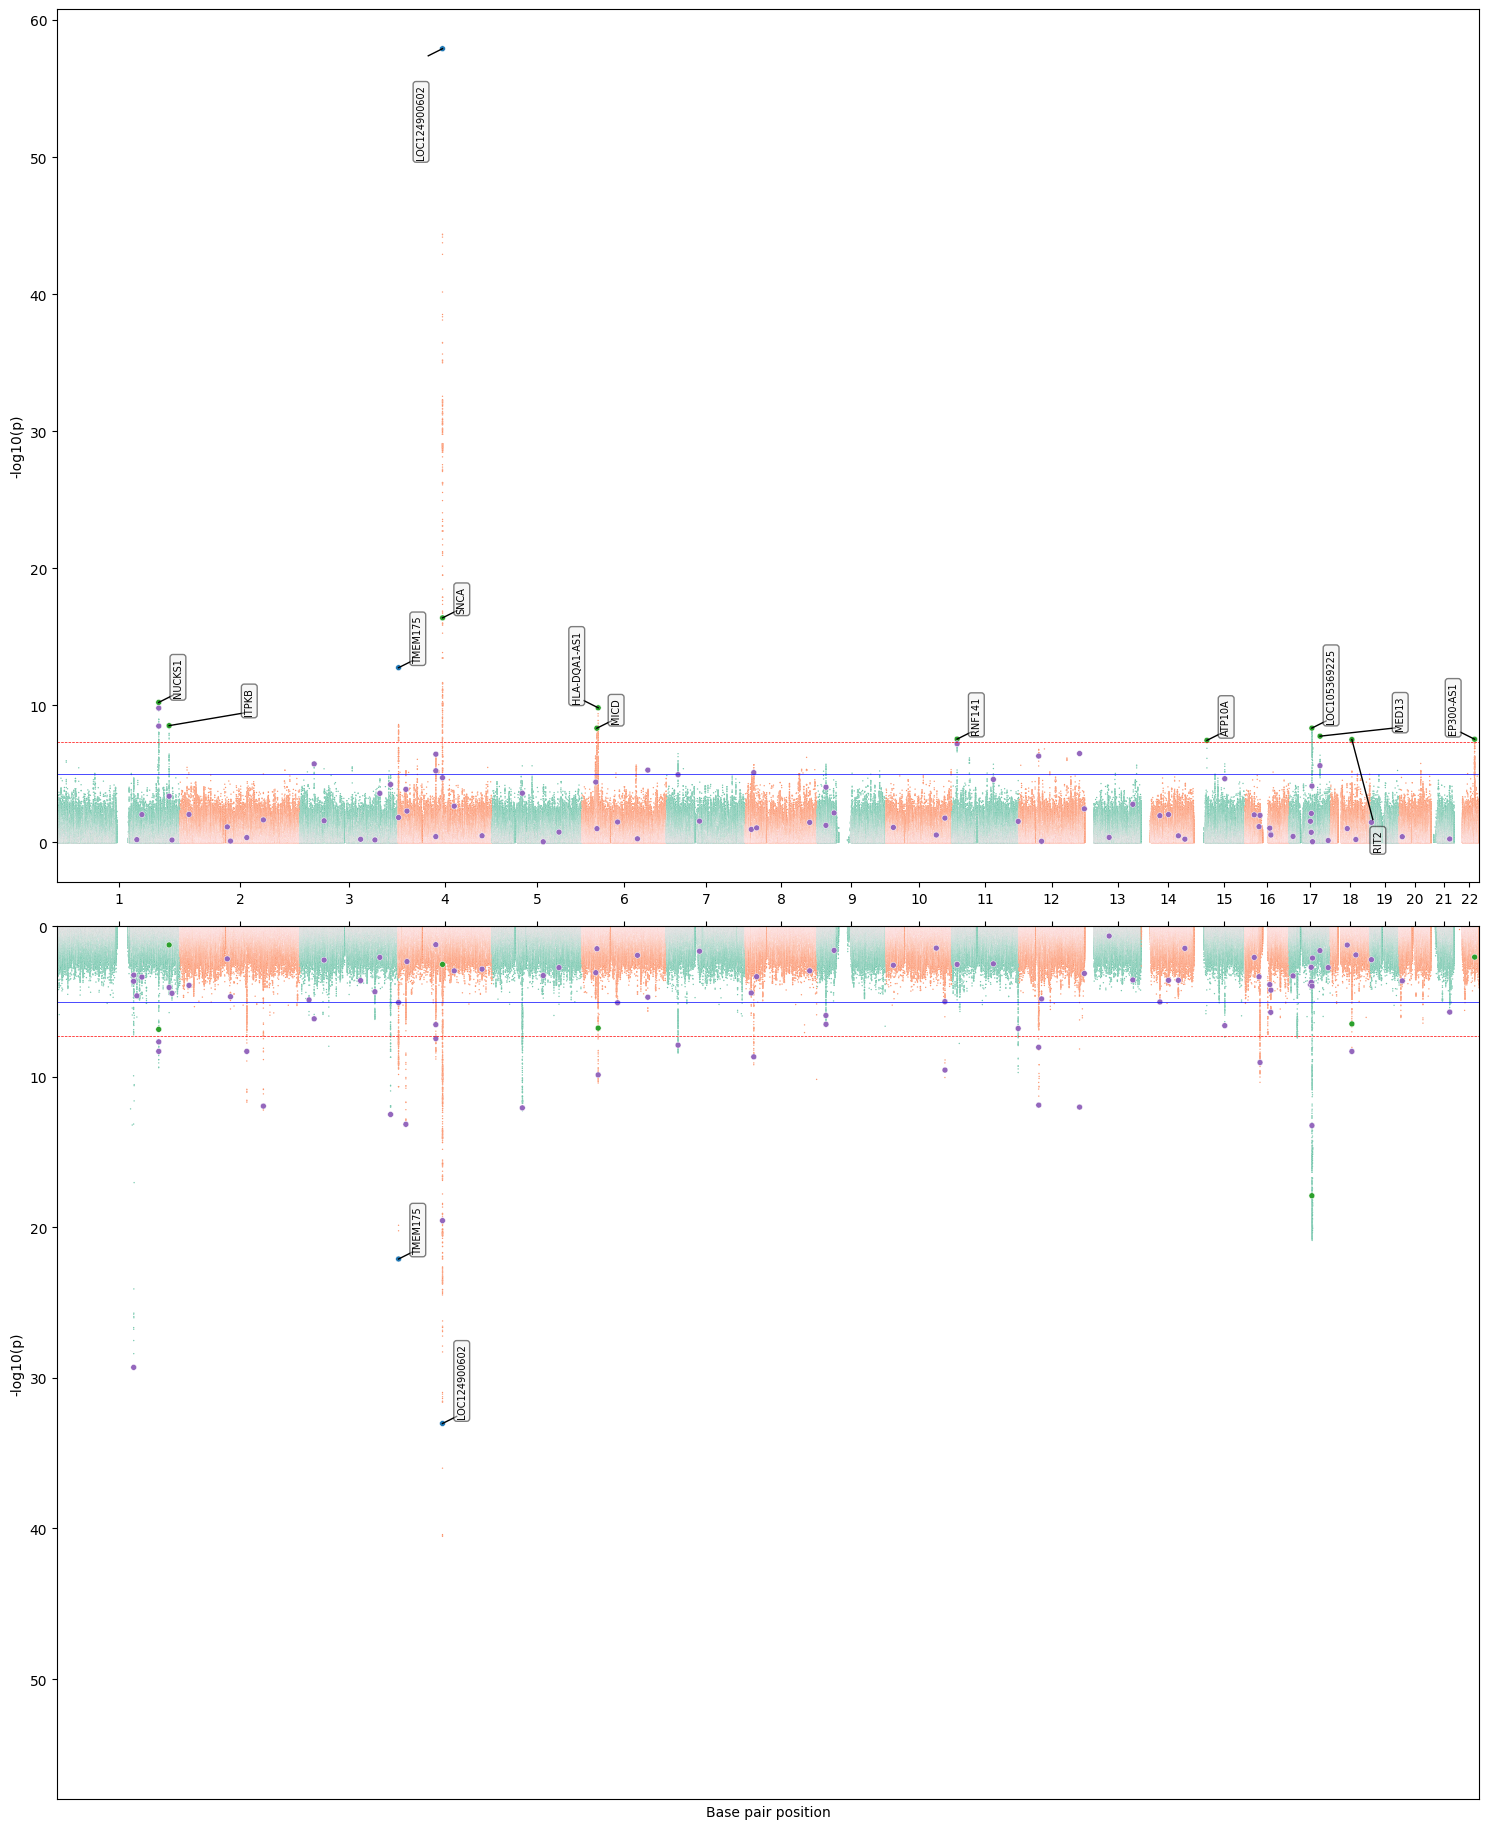

True

In [11]:
miami_draw(
    df_top=df_top, 
    df_bottom=df_bottom,
    snp_col='ID',
    chr_col='#CHROM',
    pos_col='POS',
    p_col='P',
    plots_dir=path_params[0], 
    top_highlights=top_to_highlight, 
    top_annotations=top_to_annotate,
    bottom_highlights=bottom_to_highlight, 
    bottom_annotations=[snp for snp in bottom_to_annotate if snp in top_to_annotate]
)